#### Chelsey De Dios
#### D208 Predictive Modeling
#### 11/06/2021

# D208 - Task 2 Logistic Regression for Predictive Modeling

## Part I: Research Question

### A.  Describe the purpose of this data analysis by doing the following:

#### 1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using logistic regression.

The question we will be researching in this analysis is whether we can predict customer churn based on various datapoints from this dataset.

#### 2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

The objective of this analysis will be to discover what factors in our data are good predictors of customer leaving the company and to create a model to attempt to predict a customer leaving using multiple linear regression.

## Part II: Method Justification

### B.  Describe logistic regression methods by doing the following:

#### 1.  Summarize the assumptions of a logistic regression model.

Logistic regression assumes that the possible values of our response value are binary, explanatory variables in the dataset are independent of one another and do not have a significant multicollinearity, that the dataset does not contain extreme outliers, and that the population sample size is large enough.

#### 2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

I have chosen Python due to the availability of the libraries sci-kitlearn and pandas. Pandas allows for the easy manipulation of data in dataframes and sci-kitlearn allows for the black box use of machine learning algorithms such as logistic regression.

#### 3.  Explain why logistic regression is an appropriate technique to analyze the research question summarized in Part I.

We are dealing with a binary value of Yes or No for churn. Our dataset does not contain any significant outliers, and, as we discovered in task one, only Tenure and Bandwidth are multicolinear and so banwidth will be dropped. After that, this will be a perfect dataset for logistic regression.

## Part III: Data Preparation

### C.  Summarize the data preparation process for logistic regression by doing the following:

#### 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

- Change ambiguous column names to be more descriptive
- Change datatypes to types that will support our goals, such as changing strings/objects to categories so we can easily convert them to dummy variables later on.
- Remove columns which are uneccessary to our analysis
- Check remaining columns to look for excessive collinearity to avoid breaking the assumption of variable independence for logistic regression.
- Get dummy variables for categorical variables
- Reorder Columns for Target Variable to be at the end
- Split data into training/testing sets to fit and score our linear regression model.


In [19]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# import data from csv
df = pd.read_csv('churn_clean.csv')

# set it so we can see all columns
pd.set_option('display.max_columns', None)

#### 2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

The summary statistics for our processed dataset are as follows:

In [21]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


- Population now falls between 2 and 111,850 with an average of around 9851
- Age is between 18 and 80 with an average of 53.
- Outage seconds per week falls between around 1 and 21 seconds, with an average of 10 seconds.
- Email falls between 1 and 23 emails with an average of 12
- Contacts falls between 0 and 7 with an average of around 1
- Yearly equipment failure ranges between 0 and 6 with an average of less than 1
- Tenure ranges from 1 month to 72 months with an average of 34 months.
- Monthly Charge ranges from around $80 to $290 with an average of nearly $173
- Bandwidth in GB per year ranges from around 156GB to nearly 7159GB with an average of around 3392GB
- All of our survey response columns range should range from 1-8, but some only range from 1-7 due to no customer giving the max number in those questions. They all average around 3.5

##### Change Column Names

In [22]:
# create a dictionary of current column names mapping to desired column names
survey_dict = {'Item1':'timely_responses', 
               'Item2':'timely_fixes', 
               'Item3':'timely_replacements', 
               'Item4':'reliability', 
               'Item5':'options', 
               'Item6':'respectful_response', 
               'Item7':'courteous_exchange', 
               'Item8':'evidence_of_active_listening'}

# rename the column names based on survey_dict
df = df.rename(columns=survey_dict)

##### Remove unneeded variables

Here we will subset our dataframe to include only variables relevant to our analysis.

In [23]:
# subset the dataframe to relevant variables
df = df[['Population', 'Area', 'Age', 'Gender', 'Children', 'Marital', 'Income',
         'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
         'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
         'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
         'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
         'timely_responses', 'timely_fixes', 'timely_replacements', 'reliability',
         'options', 'respectful_response', 'courteous_exchange', 
         'evidence_of_active_listening', 'Churn']]

##### Change Data Types

Now we will change the datatypes of our columns by passing a dictionary to df.astype mapping our column names to their new typing.

In [24]:
# change the dataframe columns to more appropriate data types
df = df.astype({'Population':int, 
                'Area':'category',
                'Children':int, 
                'Age':int,
                'Income':float, 
                'Marital':'category', 
                'Gender':'category', 
                'Churn':'category',
                'Outage_sec_perweek':float, 
                'Email':int, 
                'Contacts':int, 
                'Yearly_equip_failure':int,
                'Techie':'category', 
                'Contract':'category', 
                'Port_modem':'category', 
                'Tablet':'category', 
                'InternetService':'category',
                'Phone':'category', 
                'Multiple':'category', 
                'OnlineSecurity':'category', 
                'OnlineBackup':'category',
                'DeviceProtection':'category', 
                'TechSupport':'category', 
                'StreamingTV':'category', 
                'StreamingMovies':'category',
                'PaperlessBilling':'category', 
                'PaymentMethod':'category', 
                'Tenure':float, 
                'MonthlyCharge':float,
                'Bandwidth_GB_Year':float, 
                'timely_responses':int, 
                'timely_fixes':int, 
                'timely_replacements':int, 
                'reliability':int, 
                'options':int,
                'respectful_response':int, 
                'courteous_exchange':int, 
                'evidence_of_active_listening':int}, copy=False)

##### Get dummy variables for categorical data

Here we will first replace all binary values in variables with 1's and 0's. Then, using pd.getdummies we will get dummy variables/one hot encoded variables to make our categorical data numeric to work with our model

In [25]:
# get a list of columns with churn at the end
ordered_cols = [i for i in df.columns if i != 'Churn'] + ['Churn']

# reorder columns to get target variable last
ordered_df = df[ordered_cols]

In [26]:
dummy_df = ordered_df[ordered_df.columns[:-1]].replace({'Yes':1, 'No':0})

In [27]:
dummy_df = pd.get_dummies(dummy_df)
dummy_df['Churn'] = ordered_df['Churn']

In [28]:
num_cols = set(df._get_numeric_data().columns)
cat_cols = set(df.columns) - num_cols
cat_cols.remove('Churn')

dummy_cats = list(set(dummy_df.columns) - num_cols)

In [29]:
dummy_df[dummy_cats] = dummy_df[dummy_cats].astype('category')

##### Scale Numerical Data

Now we will use sklearn's StandardScaler to scale our numeric data so nothing is improperly weighted.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dummy_df[list(num_cols)] = scaler.fit_transform(dummy_df[list(num_cols)])

##### Reorder Columns for Target Variable

Next we will reorder our columns to put our target variable 'Churn' at the end.

In [31]:
ordered_cols = [i for i in dummy_df.columns if i != 'Churn'] + ['Churn']
dummy_df = dummy_df[ordered_cols]

##### Check for collinearity amongst 'independent' variables

In [32]:
dummy_df.corr()

,Population,Age,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
Population,1.000000,0.010538,-0.005877,-0.008639,0.005483,0.017962,0.004019,-0.004483,-0.003559,-0.004778,-0.003902,0.000618,-0.002571,0.001620,-0.008272,0.006970,0.000834,-0.013062,0.008524
Age,0.010538,1.000000,-0.029732,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193
Children,-0.005877,-0.029732,1.000000,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236
Income,-0.008639,-0.004091,0.009942,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740
Outage_sec_perweek,0.005483,-0.008047,0.001889,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126
Email,0.017962,0.001588,0.004479,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857
Contacts,0.004019,0.015068,-0.020776,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615
Yearly_equip_failure,-0.004483,0.008577,0.007321,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859
Tenure,-0.003559,0.016979,-0.005091,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,-0.006246,0.003073,0.002351,-0.006714,0.024618,-0.010127,0.000410,-0.016347
MonthlyCharge,-0.004778,0.010729,-0.009781,-0.003014,0.020496,0.001997,0.004259,-0.007172,-0.003337,1.000000,0.060406,0.009756,0.003442,-0.008487,-0.000440,-0.005562,0.002943,-0.006399,0.002204


As in Task 1, we can see above that 'Tenure' is very highly correlated with 'Bandwidth_GB_Year'. 'Bandwidth_GB_Year' has a slightly less relevant relationship with Churn, and so we will drop this column.

In [33]:
dummy_df = dummy_df.drop(columns='Bandwidth_GB_Year')

##### Split into training and testing sets

Finally we will split our data into training and testing sets so we can fit and then score our linear regression model.

In [34]:
from sklearn.model_selection import train_test_split

# split into train/test sets
train, test = train_test_split(dummy_df, test_size=0.3)

In [35]:
X_train, y_train, X_test, y_test = train.iloc[:,0:-1], train.iloc[:,-1:], test.iloc[:,0:-1], test.iloc[:,-1:]

#### 3.  Explain the steps used to prepare the data for the analysis, including the annotated code.

The steps are explained above.

#### 4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

#### Univariate

##### Categorical

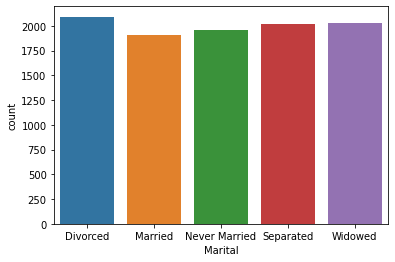

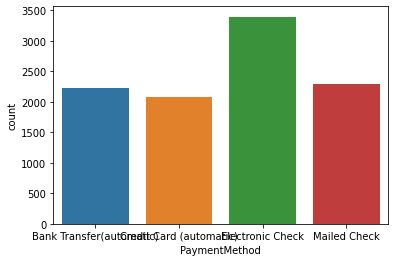

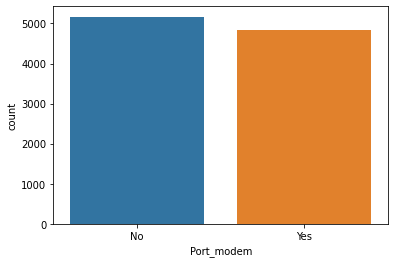

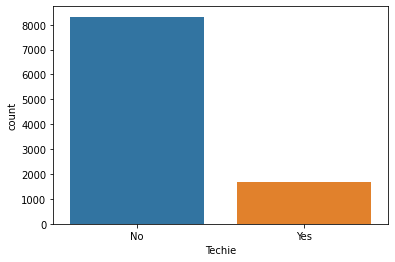

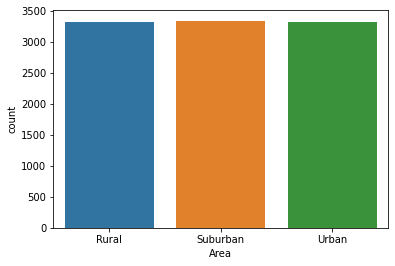

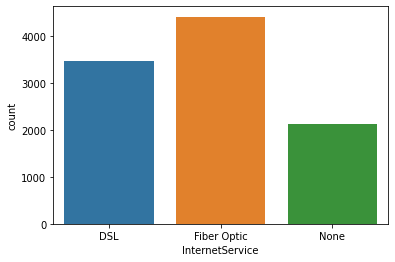

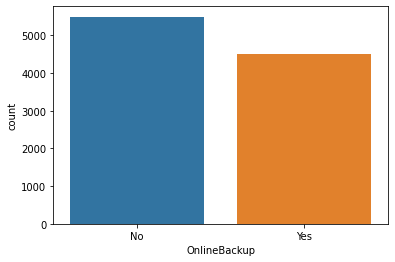

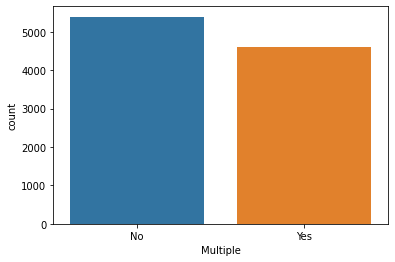

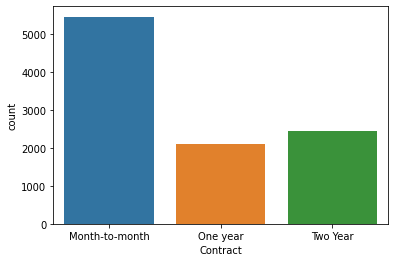

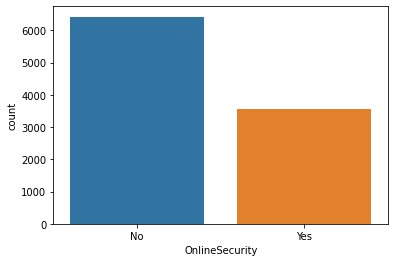

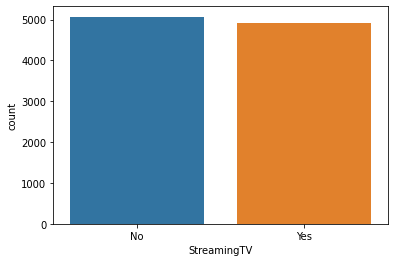

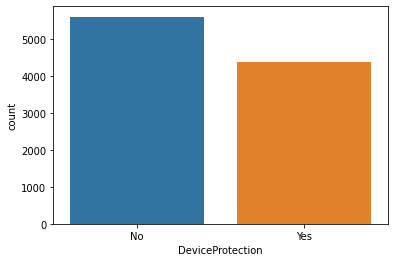

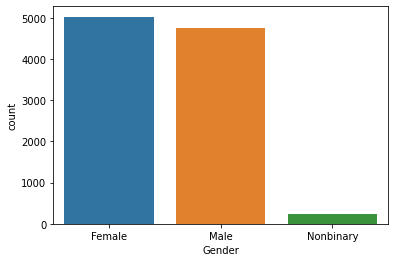

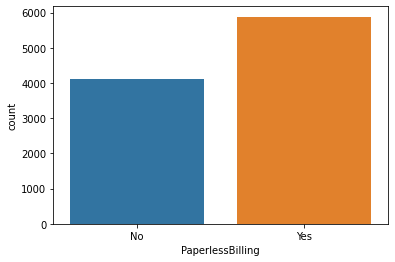

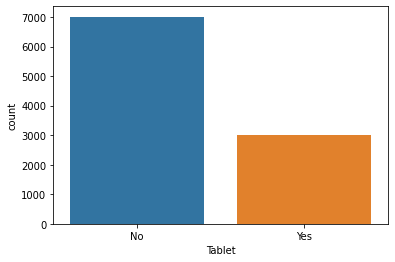

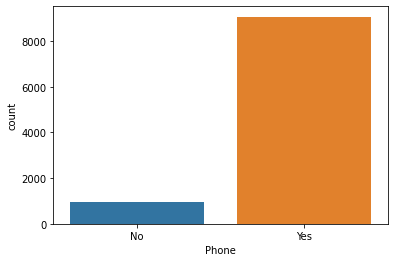

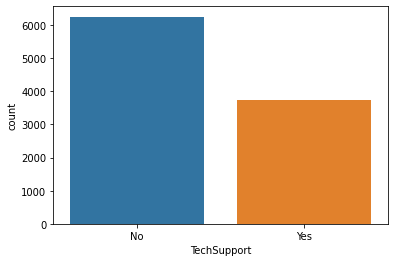

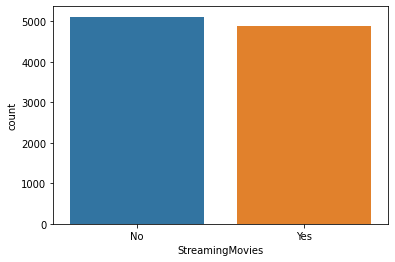

In [36]:
for i in df[cat_cols]:
    sns.countplot(data=df,
                 x=i)
    plt.show()

##### Numeric

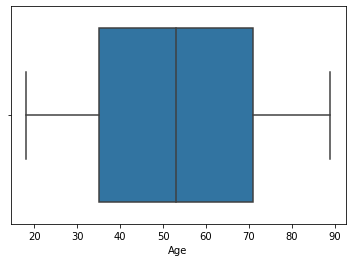

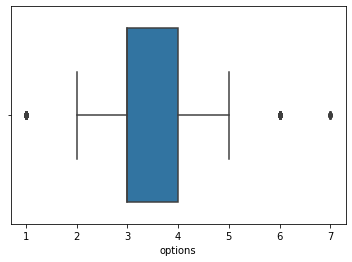

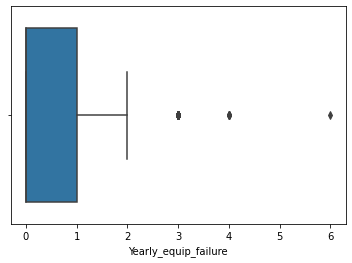

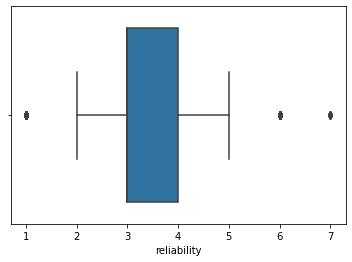

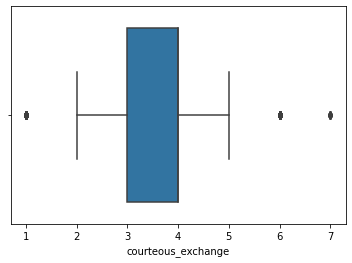

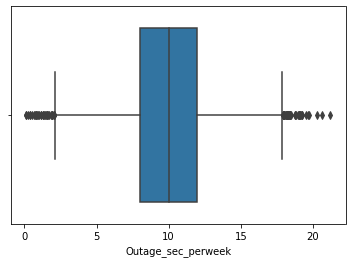

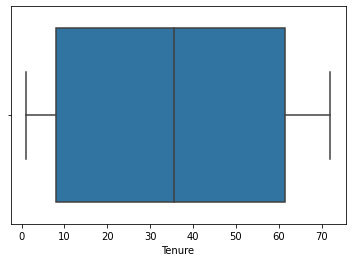

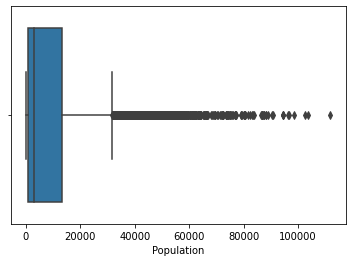

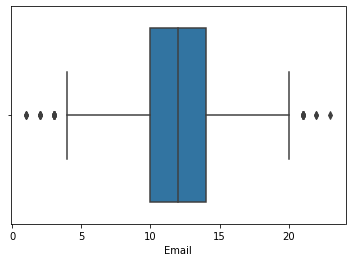

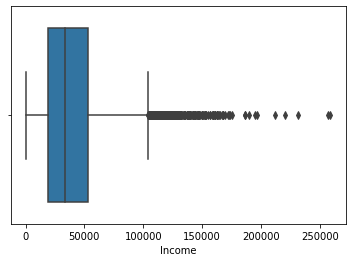

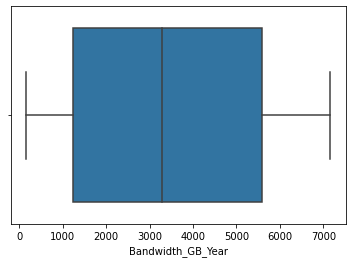

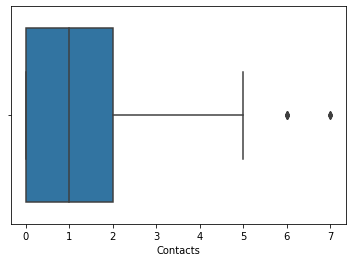

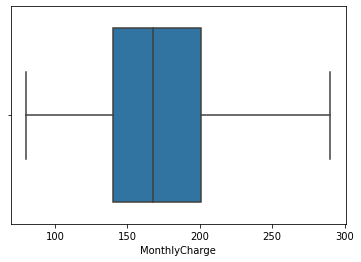

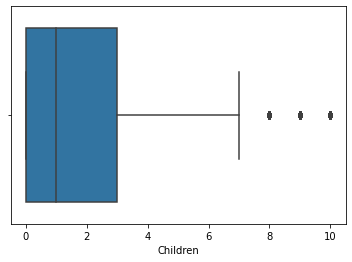

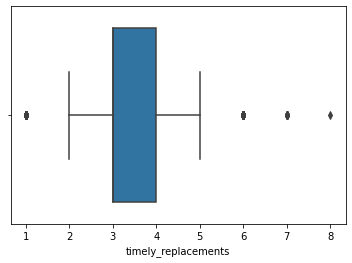

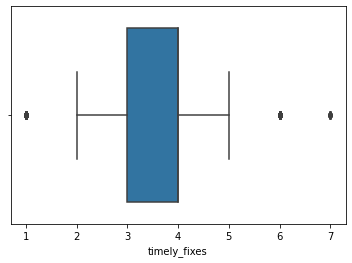

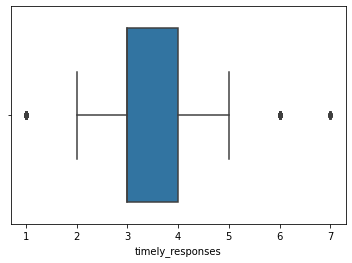

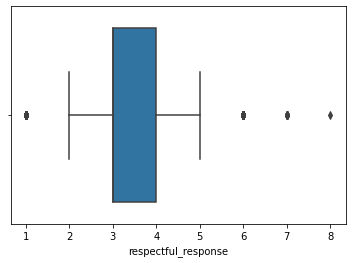

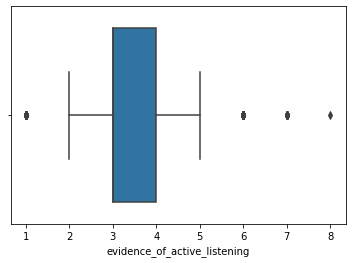

In [37]:
for i in df[num_cols]:
    sns.boxplot(data=df,
                 x=i)
    plt.show()

#### Bivariate

##### Categorical

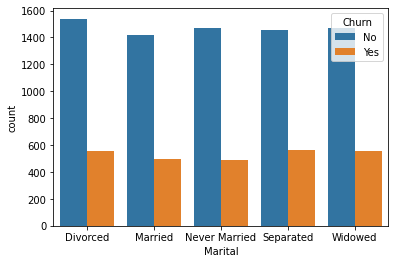

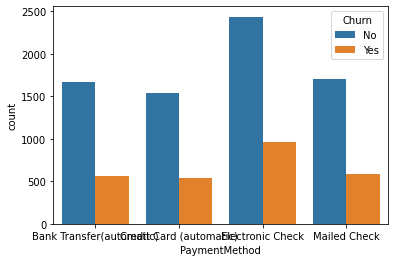

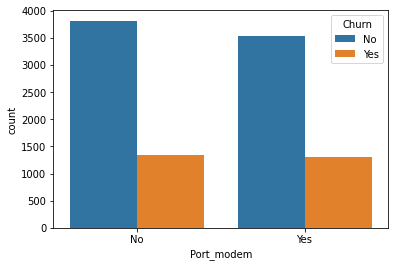

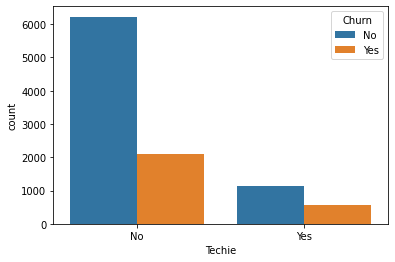

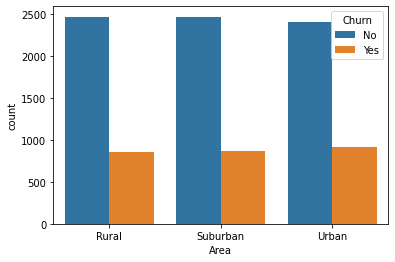

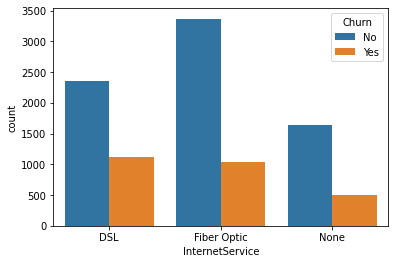

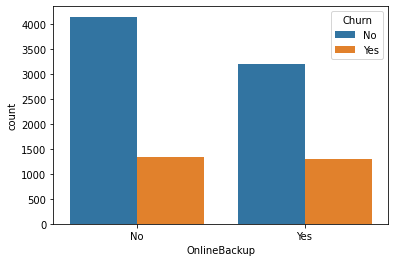

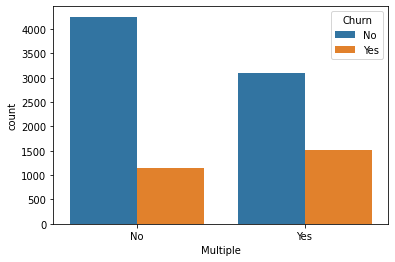

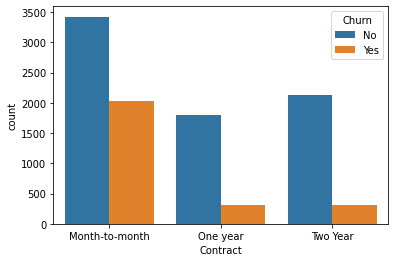

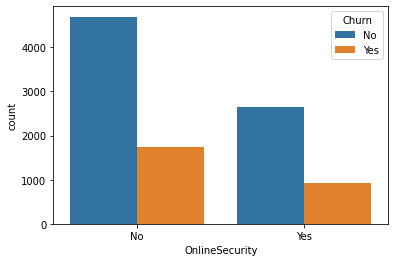

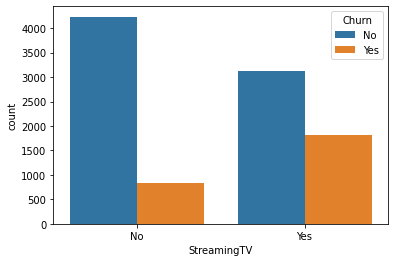

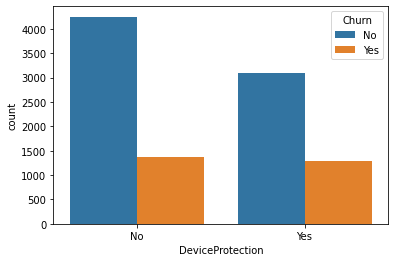

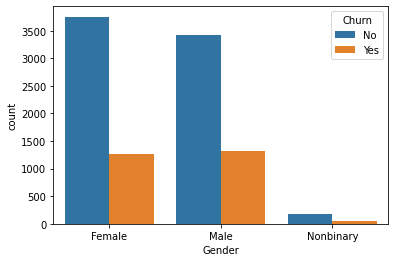

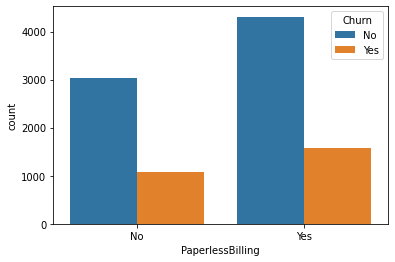

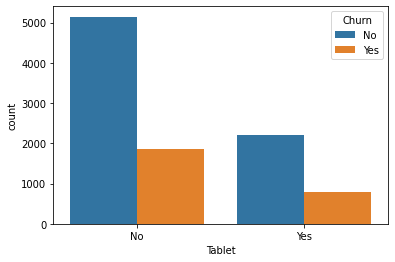

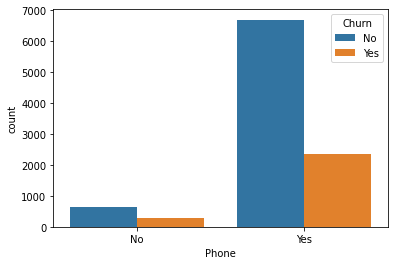

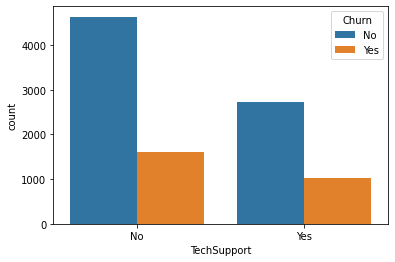

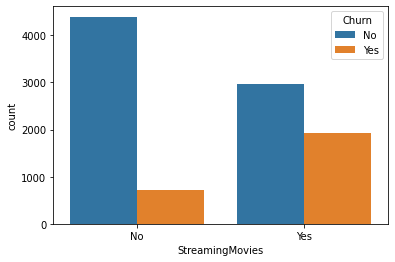

In [38]:
for i in df[cat_cols]:
    sns.countplot(data=df, x=i, hue='Churn')
    plt.show()

##### Numeric

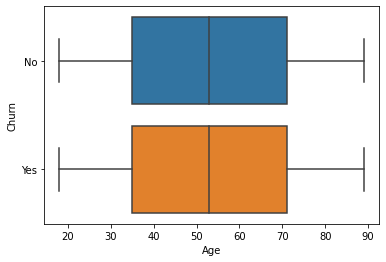

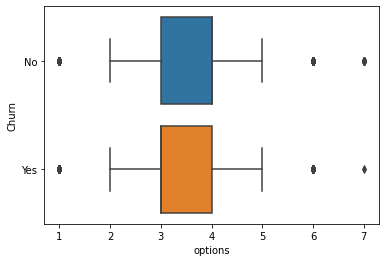

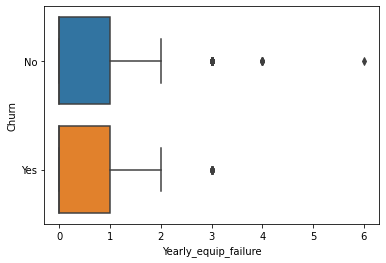

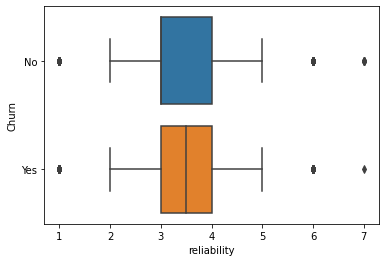

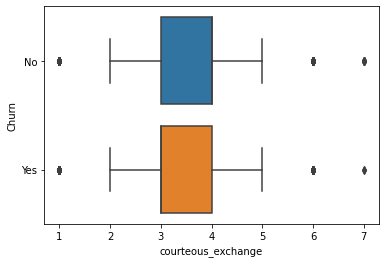

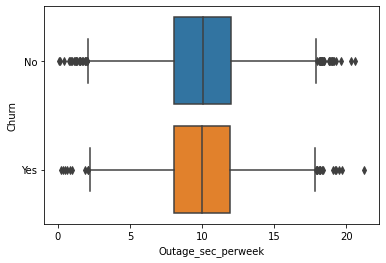

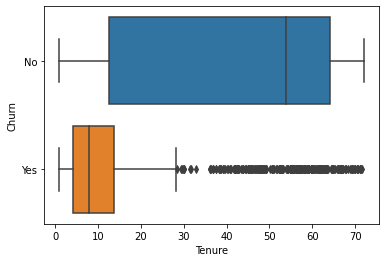

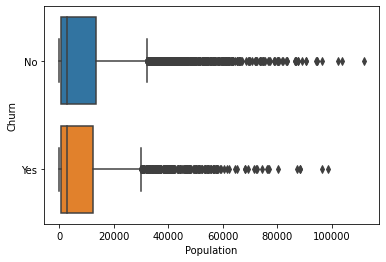

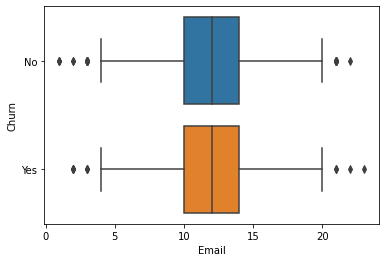

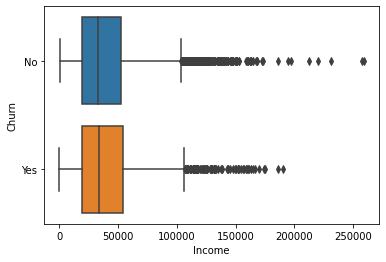

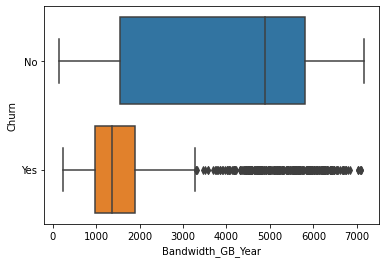

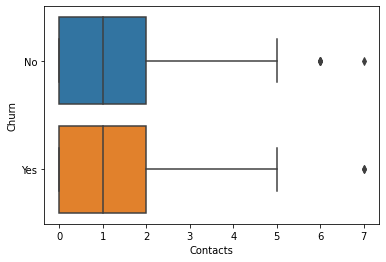

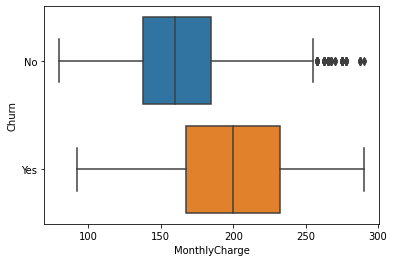

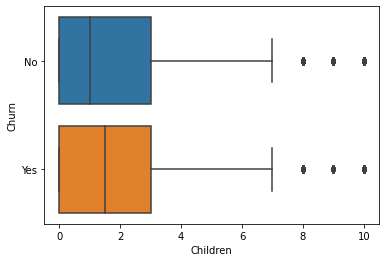

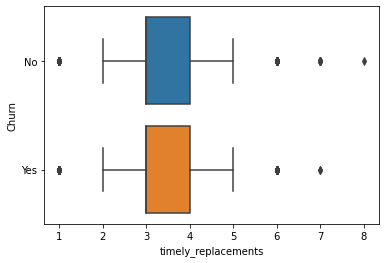

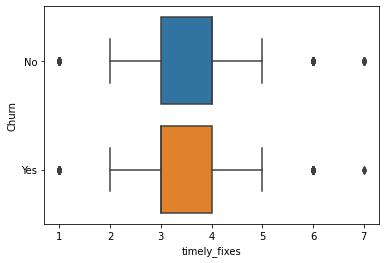

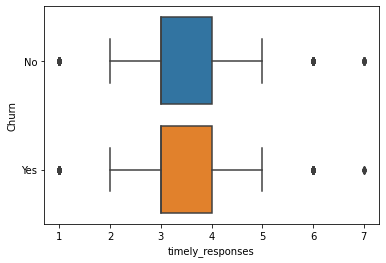

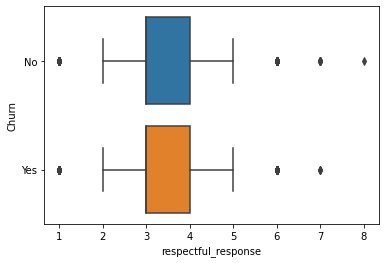

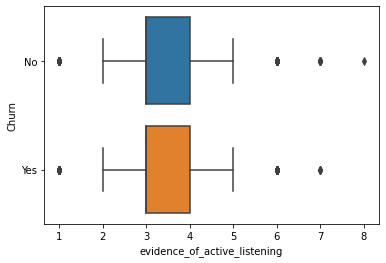

In [39]:
for i in df[num_cols]:
    sns.boxplot(data=df, x=i, y='Churn')
    plt.show()

#### 5.  Provide a copy of the prepared data set.

In [40]:
# export dataframe as csv
df.to_csv('task_2_data')

## Part IV: Model Comparison and Analysis

### D.  Compare an initial and a reduced multiple regression model by doing the following:

#### 1.  Construct an initial multiple regression model from all predictors that were identified in Part C2



In [41]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, f_regression, chi2
def get_kbest(x_train, y_train):
    selector = SelectKBest(f_classif, k='all')
    X_train_new = selector.fit_transform(x_train, y_train.values.ravel()) 
    mask = selector.get_support()    
    new_features = x_train.columns[mask]
    return(pd.DataFrame(sorted(zip(selector.pvalues_, new_features)), columns=['P-Value', 'Variable']))

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression().fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.903

In [44]:
x_num_cols = list(set(X_test._get_numeric_data().columns))
x_cat_cols = set(X_test.columns) - num_cols

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

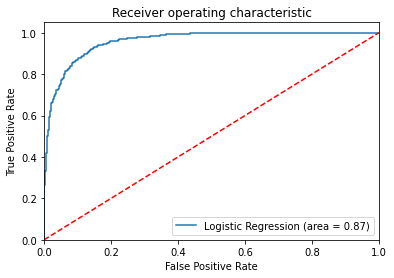

In [46]:
logit_roc_auc = roc_auc_score(y_test.replace({'Yes':1, 'No':0}).values.ravel(), pd.DataFrame(clf.predict(X_test)).replace({'Yes':1, 'No':0}).values.ravel())
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label='Yes')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

#### 2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

In [47]:
# get kbest score for each feature
kbest = get_kbest(X_train, y_train)
round(kbest.loc[kbest['P-Value'] < .05],3)

,P-Value,Variable
0,0.000,Tenure
1,0.000,MonthlyCharge
2,0.000,StreamingMovies
3,0.000,Contract_Month-to-month
4,0.000,StreamingTV
5,0.000,Contract_Two Year
6,0.000,Contract_One year
7,0.000,Multiple
8,0.000,InternetService_DSL
9,0.000,InternetService_Fiber Optic


In [48]:
kbest_feats = [i for i in kbest.loc[kbest['P-Value'] < .05]['Variable'].values]

In [49]:
X_train, X_test = X_train[kbest_feats], X_test[kbest_feats]

#### 3.  Provide a reduced Logistic regression model.

In [50]:
clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter=400).fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8996666666666666

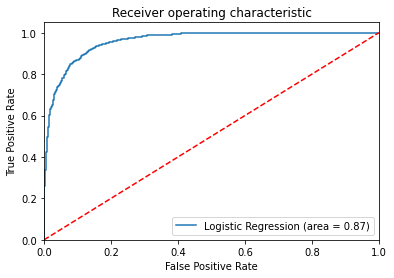

In [51]:
logit_roc_auc = roc_auc_score(y_test.replace({'Yes':1, 'No':0}).values.ravel(), pd.DataFrame(clf.predict(X_test)).replace({'Yes':1, 'No':0}).values.ravel())
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label='Yes')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

### E.  Analyze the data set using your reduced multiple regression model by doing the following:

#### 1.  Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:

* the logic of the variable selection technique

The variables selected for the logistic regression model were those that could possibly have relevance to the problem. Customer_id is randomly generated, and CaseOrder was just an index. Variables like this do not add any information and so were removed.

The variables for the reduced logistic regression model were selected using SelectKBest from sklearn from the regular linear regression model variables, and using f_regression which calculates the correlation between a regressor and a target variable, calculates an F-score and turns it into a p-value. The algorithm shows from the k-best scores all of those with a p-value of less than .05 are statistically significant, which reveals all of the variables we chose to be significant, which is why we chose them.. The top value tell us the significance of the relationship between the value and the target. A correlation matrix was also used to decide if there was too much collinearity between two values, since that would break one of the assumptions of multiple linear regression. Due to this, Bandwidth_GB_peryear was removed for being a slightly worse predictor of churn, and being highly correlated with Tenure.



* the model evaluation metric

The evaluation metric was the built in scoring method for LogisticRegression in sklearn. This scores the model based on the seperated testing set of data to see which data it classifies correctly compared to the data overall.
The score for the first model was around .901, which means it is guessing correctly around 90.1% of the time. The reduced model had a score of 0.9 . This slightly worse score may be due to less related variables affecting the output with noise, even though their contribution was not meaningful.

#### 2.  Provide the output and any calculations of the analysis you performed.

The score for the first model was around .901, which means it is guessing correctly around 90.1% of the time. The reduced model had a score of 0.9 . This slightly worse score may be due to less related variables affecting the output with noise, even though their contribution was not meaningful.

#### Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
confusion = pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)), columns=['Churn_Yes_True', 'Churn_No_True'])
confusion['idx'] = ['Churn_Yes_Pred', 'Churn_No_Pred']
confusion.set_index('idx')

,Churn_Yes_True,Churn_No_True
idx,,
Churn_Yes_Pred,2059,137
Churn_No_Pred,164,640


#### 3.  Provide the code used to support the implementation of the multiple regression models.

Code is provided above.

## Part V: Data Summary and Implications

### F.  Summarize your findings and assumptions by doing the following:


#### 1.  Discuss the results of your data analysis, including the following elements:

* a regression equation for the reduced model

In [53]:
coefs = [i for i in clf.coef_[0]]

coef_dict = dict(zip(list(X_train.columns), coefs))

In [54]:
ints = str("{:.2e}".format(clf.intercept_[0], 3)) 

mults = []
for k, v in coef_dict.items():
    if v < 0:
        mults.append(str("{:.2e}".format(v)) + '(' + str(k) + ')' )
    else:
        mults.append(str(v) + '(' + str(k) + ')' )

In [55]:
equation = ints + ' + ' + ' + '.join(mults)
equation

'-6.11e+00 + -3.00e+00(Tenure) + 1.4638474177752274(MonthlyCharge) + 1.6881304524271237(StreamingMovies) + 2.2413149422943928(Contract_Month-to-month) + 1.3990503496396327(StreamingTV) + -1.11e+00(Contract_Two Year) + -1.13e+00(Contract_One year) + 0.5064637142040056(Multiple) + 1.0285682943009373(InternetService_DSL) + -1.02e+00(InternetService_Fiber Optic) + 0.11463485573472185(OnlineBackup) + 1.1617101549095223(Techie) + -1.65e-02(DeviceProtection) + -1.09e-02(InternetService_None) + 0.5309574696826095(PaymentMethod_Electronic Check) + 0.3023342081267124(Gender_Male) + 0.10875690718243906(Gender_Female)'

* an interpretation of coefficients of the statistically significant variables of the model

The coefficients indicate how these variables affect the slope of the linear model positively or negative and to what degree

In [56]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(clf.coef_), 
                                                                     columns=['Coefficient'])], axis = 1)
coefficients.rename(columns={0:'Variable'})

,Variable,Coefficient
0,Tenure,-3.004720
1,MonthlyCharge,1.463847
2,StreamingMovies,1.688130
3,Contract_Month-to-month,2.241315
4,StreamingTV,1.399050
5,Contract_Two Year,-1.112131
6,Contract_One year,-1.128386
7,Multiple,0.506464
8,InternetService_DSL,1.028568
9,InternetService_Fiber Optic,-1.016823


* the statistical and practical significance of the model

The model shows from the k-best scores all of those with a p-value of less than .05 are statistically significant, which reveals all of the variables below to be significant.

Practically, the model only guesses correctly half of the time, which does not make it the most useful model for predicting customer churn.

In [57]:
round(kbest,3)[0:16]

,P-Value,Variable
0,0.000,Tenure
1,0.000,MonthlyCharge
2,0.000,StreamingMovies
3,0.000,Contract_Month-to-month
4,0.000,StreamingTV
5,0.000,Contract_Two Year
6,0.000,Contract_One year
7,0.000,Multiple
8,0.000,InternetService_DSL
9,0.000,InternetService_Fiber Optic




* the limitations of the data analysis

The limitations of this analysis would include that the amount of customers we have data for is limited at only 10,000 entries. The customers also come from nearly all unqiue cities making it hard to do an area analysis. The dataset also has a great deal of unusual data, including 19 year olds with 8 children who are retired. Being that this data must not be based on real-world data, it makes it hard to draw more meaningful conclusions.

#### 2.  Recommend a course of action based on your results.

The first course of action would be, of course, to maintain customers, thus improving their tenure. Next it seems monthly charges should be assessed to discover data regarding why customers with high charges are leaving. This could be done with a market analysis and customer surveys. Streaming movies and TV seems to improve customer retention and so if they are not already, these should perhaps be pushed toward customers more, or perhaps offered in packages to improve customer retention.

## Part VI: Demonstration

### G.  Provide a Panopto video recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=4485432b-e96f-40f2-a090-addb001f6c21


### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.

“Python Logistic Regression.” Ajay Tech, https://ajaytech.co/python-logistic-regression/#visualization. 

### I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized

Zach. “The 6 Assumptions of Logistic Regression (with Examples).” Statology, 13 Oct. 2020, https://www.statology.org/assumptions-of-logistic-regression/. 